In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from copy import copy, deepcopy
import pickle

In [64]:
with open('statcast_hit_predictions.pkl', 'rb') as pfile:
    hit_data = pickle.load(pfile)

In [65]:
hit_data.head()

,game_date,game_year,home_team,away_team,def_team,at_bat_number,events,launch_angle,launch_speed,spray_angle,...,lf,lc,cf,rc,rf,hit_rate_wk,hit_rate_mo,hit,pred_thr_hit,pred_hit
0,2019-03-28,2019,LAD,ARI,ARI,5,double,28.5,94.9,-22.208982,...,330,375,395,375,330,0.000000,0.000000,1,1,0
1,2019-03-28,2019,LAD,ARI,ARI,7,field_out,-24.6,48.4,-20.336267,...,330,375,395,375,330,1.000000,1.000000,0,0,0
2,2019-03-28,2019,LAD,ARI,ARI,8,field_out,-4.6,82.4,27.977480,...,330,375,395,375,330,0.500000,0.500000,0,0,0
3,2019-03-28,2019,LAD,ARI,ARI,10,field_out,-20.7,82.9,28.500541,...,330,375,395,375,330,0.333333,0.333333,0,0,0
4,2019-03-28,2019,LAD,ARI,ARI,14,field_out,0.9,111.4,-15.118108,...,330,375,395,375,330,0.250000,0.250000,0,1,0


In [103]:
def pred_result(row, pred):
    if row['hit'] + row[pred] == 2:
        return 'TP'
    elif row['hit'] + row[pred] == 0:
        return 'TN'
    else:
        return 'FP' if row['hit'] == 0 else 'FN'

In [128]:
hit_data['pred_result'] = hit_data.apply(lambda r: pred_result(row=r, pred='pred_hit'), axis=1)
hit_data['pred_thr_result'] = hit_data.apply(lambda r: pred_result(row=r, pred='pred_thr_hit'), axis=1)

In [113]:
hit_events = ['single', 'double', 'triple', 'home_run']

In [131]:
hit_data_onlyhits = hit_data[hit_data['events'].isin(hit_events)]

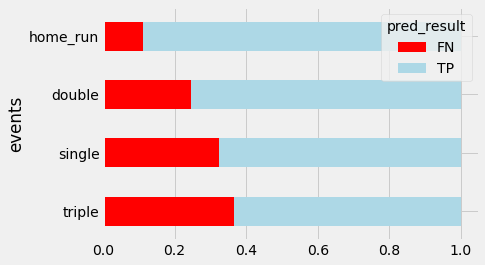

In [132]:
pd.crosstab(hit_data_onlyhits['events'], hit_data_onlyhits['pred_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'));

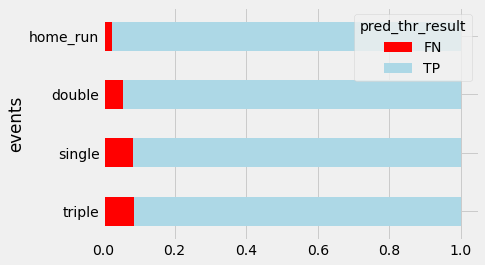

In [133]:
pd.crosstab(hit_data_onlyhits['events'], hit_data_onlyhits['pred_thr_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'));

In [134]:
hit_data_onlyouts = hit_data[~hit_data['events'].isin(hit_events)]

In [135]:
hit_data_onlyouts.groupby("events").size()

events
double_play                    403
field_out                    72244
fielders_choice_out            287
force_out                     3560
grounded_into_double_play     3451
sac_bunt                       772
sac_bunt_double_play             3
sac_fly                       1137
sac_fly_double_play             11
triple_play                      3
dtype: int64

In [136]:
hit_data_onlyouts = hit_data_onlyouts[~hit_data_onlyouts['events'].isin(['sac_bunt_double_play', 'sac_fly_double_play', 'triple_play'])]

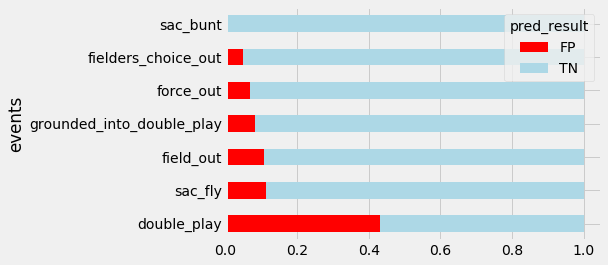

In [137]:
pd.crosstab(hit_data_onlyouts['events'], hit_data_onlyouts['pred_result'], normalize='index')\
    .sort_values(by='TN').plot.barh(stacked=True, color=('red','lightblue'));

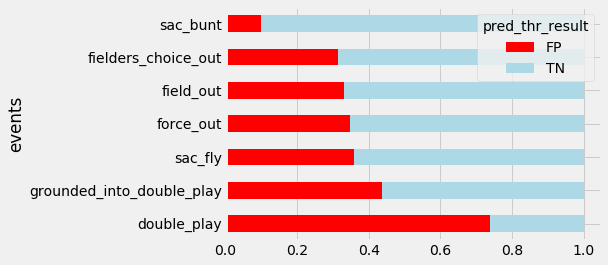

In [138]:
pd.crosstab(hit_data_onlyouts['events'], hit_data_onlyouts['pred_thr_result'], normalize='index')\
    .sort_values(by='TN').plot.barh(stacked=True, color=('red','lightblue'));

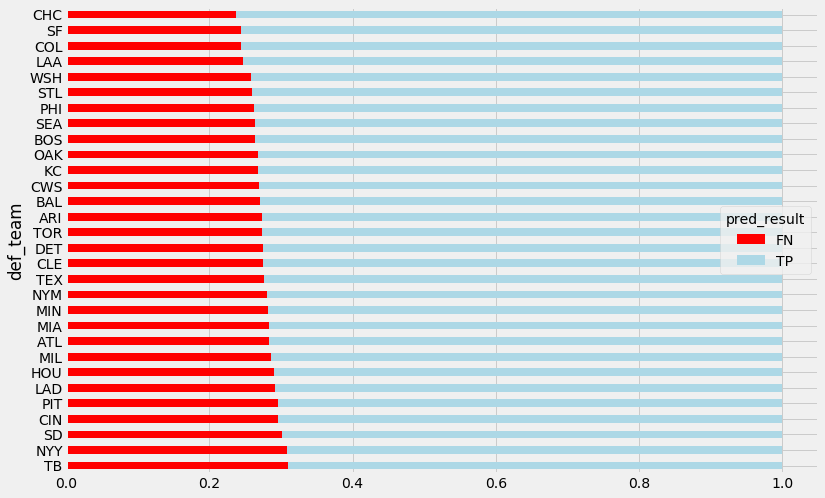

In [123]:
pd.crosstab(hit_data_onlyhits['def_team'], hit_data_onlyhits['pred_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

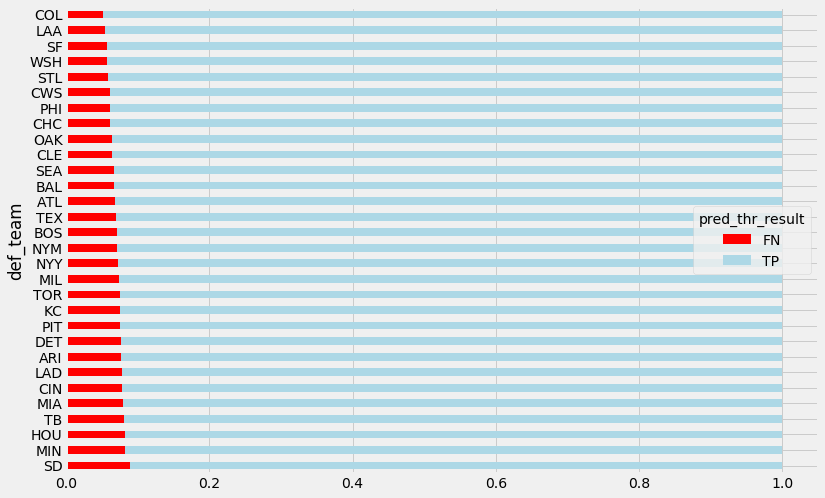

In [139]:
pd.crosstab(hit_data_onlyhits['def_team'], hit_data_onlyhits['pred_thr_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

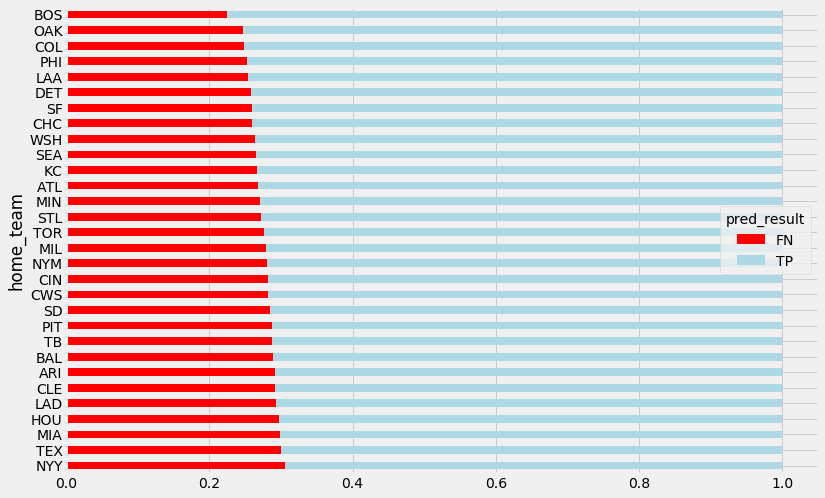

In [140]:
pd.crosstab(hit_data_onlyhits['home_team'], hit_data_onlyhits['pred_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

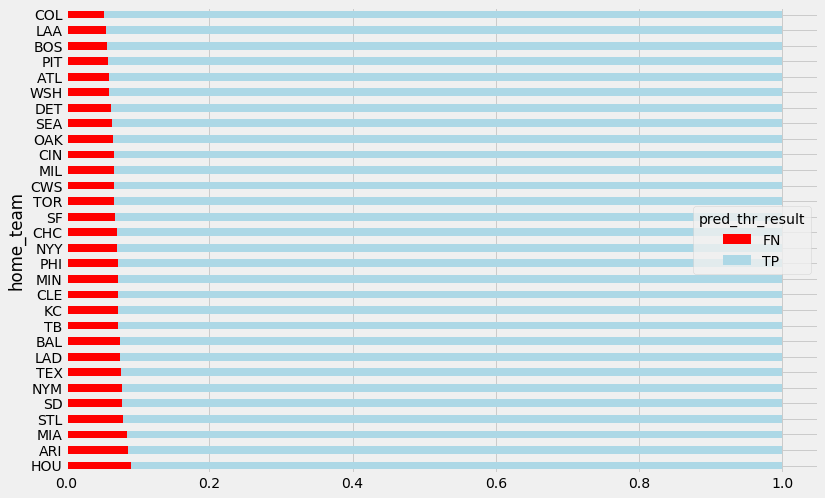

In [141]:
pd.crosstab(hit_data_onlyhits['home_team'], hit_data_onlyhits['pred_thr_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

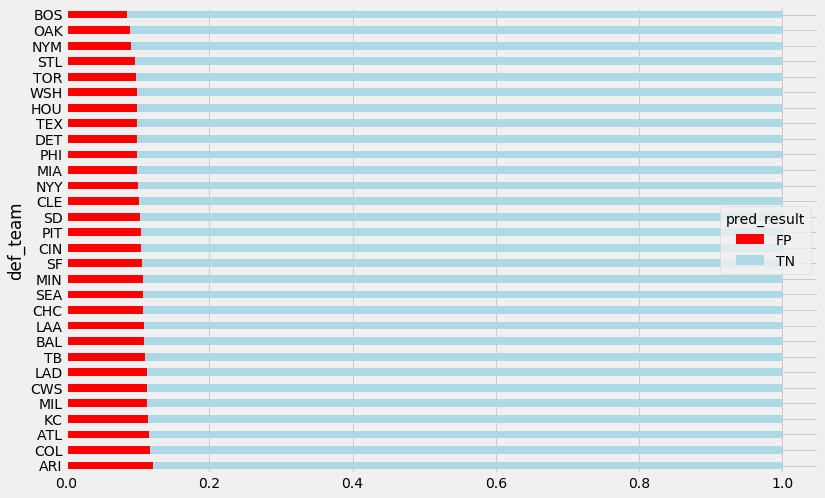

In [142]:
pd.crosstab(hit_data_onlyouts['def_team'], hit_data_onlyouts['pred_result'], normalize='index')\
    .sort_values(by='TN').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

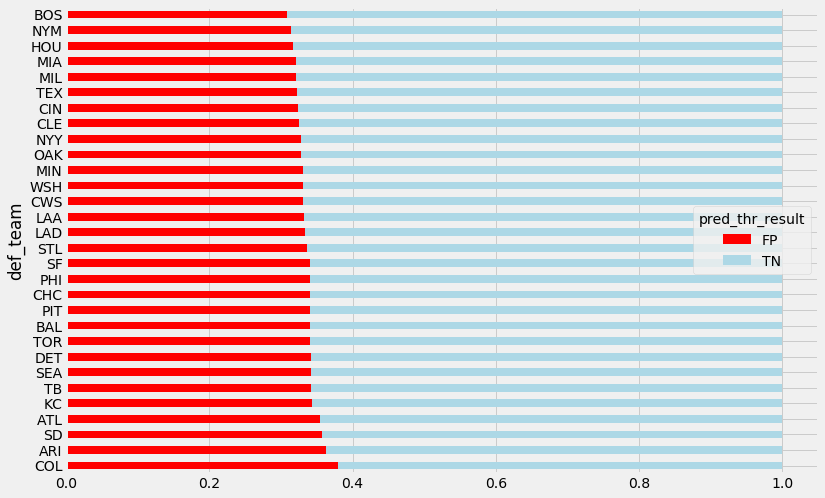

In [143]:
pd.crosstab(hit_data_onlyouts['def_team'], hit_data_onlyouts['pred_thr_result'], normalize='index')\
    .sort_values(by='TN').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

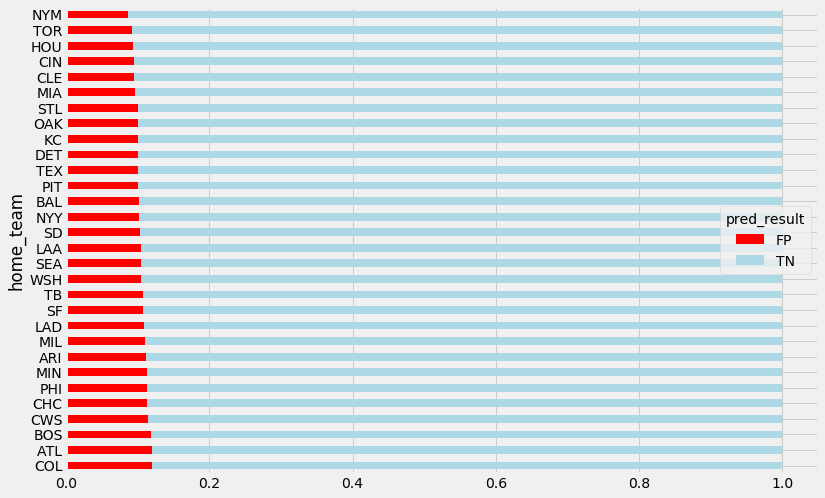

In [144]:
pd.crosstab(hit_data_onlyouts['home_team'], hit_data_onlyouts['pred_result'], normalize='index')\
    .sort_values(by='TN').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

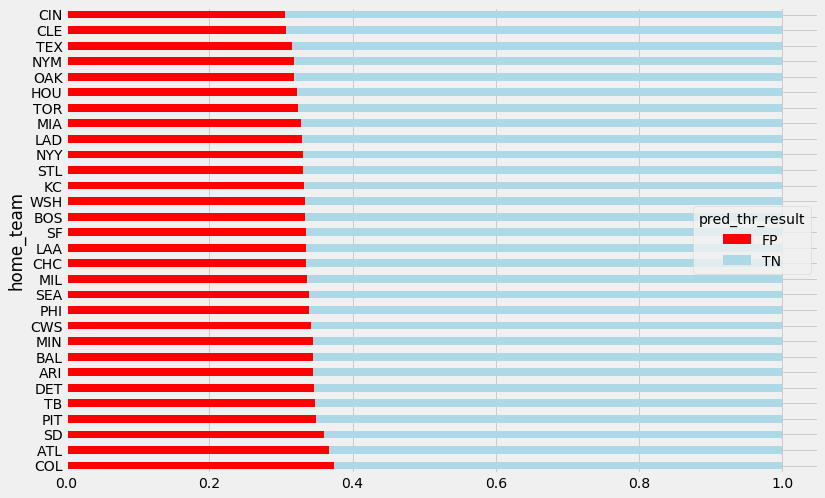

In [145]:
pd.crosstab(hit_data_onlyouts['home_team'], hit_data_onlyouts['pred_thr_result'], normalize='index')\
    .sort_values(by='TN').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

In [146]:
hit_data_prec = hit_data[hit_data['pred_result'].isin(['TP','FP'])]

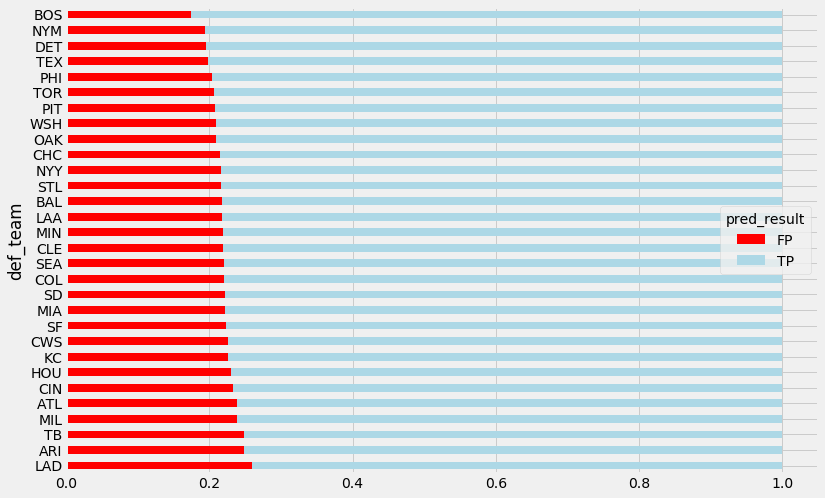

In [148]:
pd.crosstab(hit_data_prec['def_team'], hit_data_prec['pred_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));

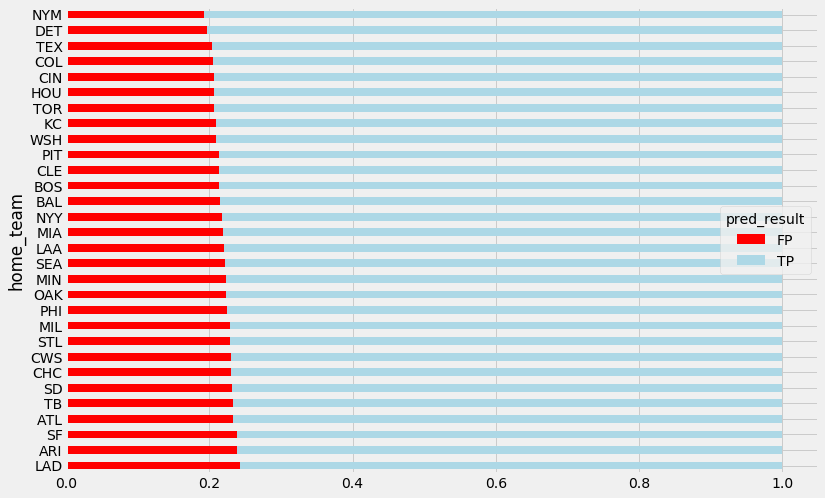

In [149]:
pd.crosstab(hit_data_prec['home_team'], hit_data_prec['pred_result'], normalize='index')\
    .sort_values(by='TP').plot.barh(stacked=True, color=('red','lightblue'), figsize=(12,8));